<IPython.core.display.Javascript object>


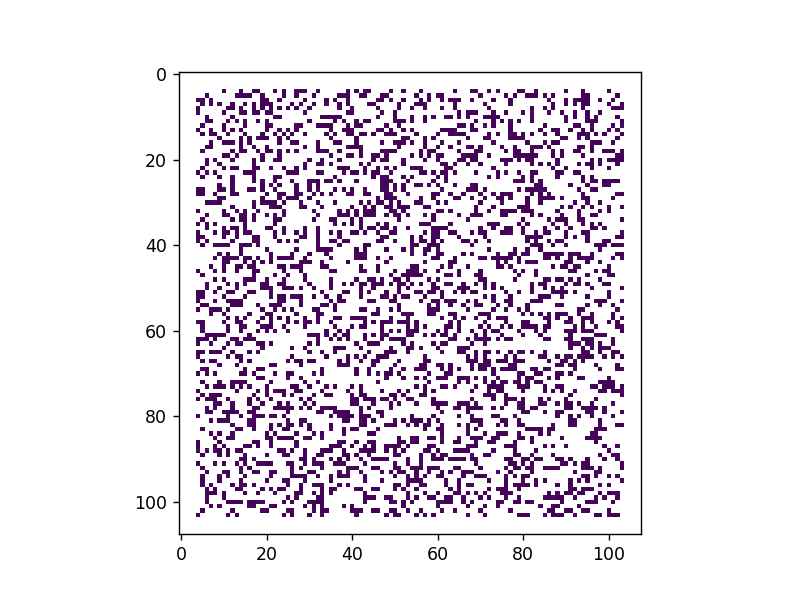

In [3]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
%matplotlib notebook
import matplotlib.colors as colors
from simulation import *
from viz import plot_slices_of_simulation
import matplotlib.pyplot as plt
import matplotlib.animation as animation

m = 0.5 # placeholder, not used. 
L = 100
t_steps = 500
d = 4
init_grass=0.2 
init_tree=0.1
p_disp=0.001
p_prop=0.08
min_seed=20
r_grow=0.1
tree_carrying_capacity = 200
neighborhood_carrying_capacity = 1900
max_ignite=0.001
rng = np.random.default_rng(12345)


params_dict = initialize_params_dict(m=m, 
                                        L=L, 
                                        t_steps=t_steps, 
                                        d=d, 
                                        init_grass=init_grass, 
                                        init_tree=init_tree, 
                                        p_disp=p_disp, 
                                p_prop=p_prop,
                                min_seed=min_seed,
                                r_grow=r_grow, 
                                tree_carrying_capacity=tree_carrying_capacity,
                                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                                max_ignite=max_ignite, 
                                rng=rng)
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()




forest = initialize_forest(L=L, 
                            d=d, 
                            init_grass=init_grass, 
                            init_tree=init_tree, 
                            rng=rng)

im = ax.imshow(forest, vmin=1, vmax=tree_carrying_capacity*1.2, alpha=(forest > 0).astype(float))

def animate_func(i):
    global forest
    forest = grow_season(forest, params_dict) 
    forest, area_burned, indices_burned = fire_season(forest, params_dict)
    
    im.set_array(forest)
    im.set_alpha((forest > 0).astype(float))
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = t_steps,
                               interval = 200, # in ms
                               )




In [2]:
# install package to save video 
%conda install ffmpeg

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\jkahn\anaconda3

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py38haa244fe_0         1.0 MB  conda-forge
    ffmpeg-4.3.1               |       ha925a31_0        26.2 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        27.2 MB

The following NEW packages will be INSTALLED:

  ffmpeg             conda-forge/win-64::ffmpeg-4.3.1-ha925a31_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.14.0-py38haa244fe_0




conda-4.14.0  



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




conda-4.14.0         | 1.0 MB    | #####9     |  60% 
conda-4.14.0         | 1.0 MB    | ########## | 100% 
conda-4.14.0         | 1.0 MB    | ########## | 100% 

ffmpeg-4.3.1         | 26.2 MB   |            |   0% 
ffmpeg-4.3.1         | 26.2 MB   | 6          |   7% 
ffmpeg-4.3.1         | 26.2 MB   | ##         |  21% 
ffmpeg-4.3.1         | 26.2 MB   | ###6       |  37% 
ffmpeg-4.3.1         | 26.2 MB   | #####3     |  54% 
ffmpeg-4.3.1         | 26.2 MB   | #######2   |  73% 
ffmpeg-4.3.1         | 26.2 MB   | #########2 |  93% 
ffmpeg-4.3.1         | 26.2 MB   | ########## | 100% 

python_abi-3.8       | 4 KB      |            |   0% 
python_abi-3.8       | 4 KB      | ########## | 100% 
python_abi-3.8       | 4 KB      | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


c:\Users\jkahn\Documents\Grad school\QERM 497 (Modeling Complex Systems)\QERM479_FinalProject\simulation.py:162: RuntimeWarning: divide by zero encountered in divide
  ignition_probability = max_ignite / forest[d:-d, d:-d]


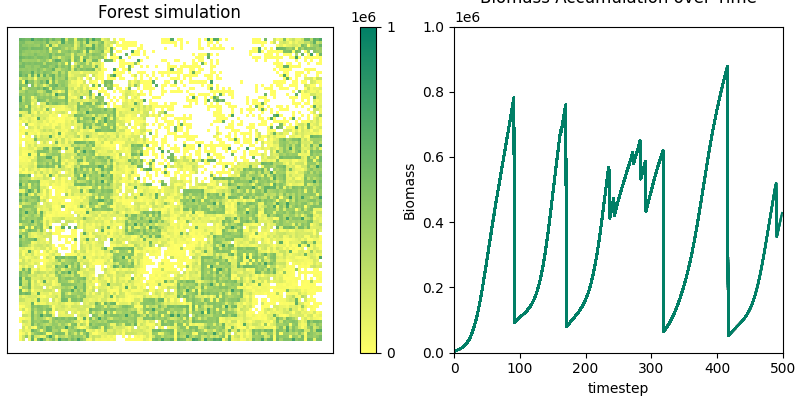

In [3]:
# this block takes about 3min on my computer to run

import matplotlib.colors as colors
import ipympl
from simulation import *
from viz import plot_slices_of_simulation, theme_colors
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
%matplotlib ipympl

m = 0.5 # placeholder, not used. 
L = 100
t_steps = 500
d = 4
init_grass=0.2 
init_tree=0.1
p_disp=0.001
p_prop=0.08
min_seed=20
r_grow=0.1
tree_carrying_capacity = 200
neighborhood_carrying_capacity = 1900
max_ignite=0.001
rng=np.random.default_rng(12340)

params_dict = initialize_params_dict(m=m, 
                                        L=L, 
                                        t_steps=t_steps, 
                                        d=d, 
                                        init_grass=init_grass, 
                                        init_tree=init_tree, 
                                        p_disp=p_disp, 
                                p_prop=p_prop,
                                min_seed=min_seed,
                                r_grow=r_grow, 
                                tree_carrying_capacity=tree_carrying_capacity,
                                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                                max_ignite=max_ignite, 
                                rng=rng)


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), layout="constrained")


forest = initialize_forest(L=L, 
                            d=d, 
                            init_grass=init_grass, 
                            init_tree=init_tree, 
                            rng=rng)

biomass_upper_bound = 1e6

im = ax[0].imshow(forest, vmin=1, vmax=tree_carrying_capacity*1.2, alpha=(forest > 0).astype(float))
im.set_cmap('summer_r')
norm = colors.Normalize(vmin=0, vmax=biomass_upper_bound)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap='summer_r'), ax=ax[0], ticks=[0, biomass_upper_bound]) # add color legend to simulation
ax[1].set_ylim((0, biomass_upper_bound)) #set consistent y-scale for whole sim
ax[1].set_xlim((0, t_steps)) #set consistent x-scale for whole sim

ax[1].set_title("Biomass Accumulation over Time")
ax[1].set_ylabel("Biomass")
ax[1].set_xlabel("timestep")
ax[0].set_title("Forest simulation")
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)
t,biomass = [],[]

counter = 0

def animate_func(i):
    global forest, counter

    forest = grow_season(forest, params_dict) 
    forest, area_burned, indices_burned = fire_season(forest, params_dict)

    t.append(i)
    biomass.append(np.sum(forest))
    ax[1].plot(t, biomass, color = theme_colors['green']) 

    im.set_array(forest)
    im.set_alpha((forest > 0).astype(float))

    counter =+ 1
    return [ax]

anim = animation.FuncAnimation(
                            fig, 
                            animate_func, 
                            frames = t_steps,
                            interval = 50, # time between frames in ms
                            repeat=False, 
                            )

writervideo = animation.FFMpegWriter(fps=15)  
anim.save("wildfiresim.mp4", writer=writervideo)

